# Multilayer Perceptron : 분류

### Jupyter Notebook 단축키
- ctrl+enter: 셀 실행
- shift+enter: 셀 실행 및 다음 셀 이동
- alt+enter: 셀 실행, 다음 셀 이동, 새로운 셀 생성
- a: 상단에 새로운 셀 만들기
- b: 하단에 새로운 셀 만들기
- dd: 셀 삭제(x: 셀 삭제)
- z: 셀 복구
- esc: 셀 나가기
- m: code -> markdown
- y: markdown -> code

## 0. 모듈 불러오기

In [6]:
''' 기본 모듈 및 시각화 모듈 '''
from IPython.display import display
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

''' 데이터 전처리 모듈 '''
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

''' Multilayer Perceptron 모듈 '''
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

''' 결과 평가용 모듈 '''
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

''' 기타 optional'''
pd.options.display.float_format = '{:.4f}'.format

! git clone https://github.com/hansam95/LG_time_series_day08.git

fatal: destination path 'test' already exists and is not an empty directory.


## 1. 분석데이터: Parkinsons (이진 분류 문제)

<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large174.jpg" width="300"></img><br>
<a href='https://archive.ics.uci.edu/ml/datasets/Parkinsons'> https://archive.ics.uci.edu/ml/datasets/Parkinsons </a>

### 설명변수 (X): 환자의 특성
- name
- MDVP:Fo(Hz)
- MDVP:Fhi(Hz)
- MDVP:Flo(Hz)
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA
- NHR,HNR
- RPDE,D2
- DFA
- spread1,spread2,PPE

### 반응변수 (Y): 환자의 상태
- status: 0(정상), 1(파킨슨병)


### 데이터 불러오기

In [ ]:
data = pd.read_csv('./LG_time_series_day08/data/Parkinsons.csv')

## 1-1. 데이터 전처리 및 탐색적 데이터 분석

### 데이터 확인

In [ ]:
print('Data shape: {}'.format(data.shape))
data.head()

In [ ]:
data.describe()

### 불필요한 변수 제거

In [ ]:
# name 고유 개수
num_name = len(data['name'].unique())

print(f'name: {num_name}')

In [11]:
# name 제거
data.drop(columns=['name'], inplace=True)

In [ ]:
print('Data shape: {}'.format(data.shape))
data.head()

### 클래스 비율 확인
0: 정상 <br>
1: 파킨슨병

In [ ]:
data['status'].value_counts()

### 설명변수(X)와 반응변수(Y) 정의

In [14]:
X = data.drop(labels='status', axis=1)
y = data['status']

In [ ]:
display(X.head())
display(y.head())

### 학습 데이터(Training Dataset)와 테스트 데이터(Testing Dataset) 분리
- 학습데이터와 테스트 데이터의 클래스 비율이 달라지지 않도록 stratify 옵션 사용


In [16]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

### Matplotlib 을 이용한 클래스 비율 plotting
- plt.figure: plot을 그리기 위해 가장 먼저 선언 & plot 크기 지정
- plt.subplot: plot을 한번에 여러개 그리기 위해 선언(행크기/열크기/plot번호)
- plt.hist: 히스토그램
- plt.xlim: x축 (최소,최대) 지정
- plt.ylim: y축 (최소,최대) 지정
- plt.xticks: x축 좌표 지정
- plt.yticks: y축 좌표 지정
- plt.title: 해당 plot의 제목 지정
- plt.show(): plot을 그리기 위해 가장 "마지막" 선언

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.hist(train_y)
plt.xlim(-0.3,1.3)
plt.ylim(0, 110)
plt.xticks(ticks=[0.05,0.95], labels=[0,1])
plt.title('Training Data')

plt.subplot(122)
plt.hist(test_y)
plt.xlim(-0.3,1.3)
plt.ylim(0, 110)
plt.xticks(ticks=[0.05,0.95], labels=[0,1])
plt.title('Testing Data')
plt.show()

### 정규화 : Standardization(표준정규화) with Standard Scaler

- 설명변수(X) 내 변수별 평균이 0이 되도록 변환
- Training Data를 기준으로 Scaler를 구성한 뒤, Testing Data에 Scaler를 적용

#### $$ z = \frac{(x - \mu)}{\sigma} $$

In [ ]:
train_X.describe()

In [18]:
# 정규화
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [ ]:
pd.DataFrame(train_X, columns = X.columns).describe()

## 1-2. 모델링: Multilayer Perceptron (MLP) Classifier

### MLP Classifier 구조
<img src='./image/image01.png' width='600'></img>
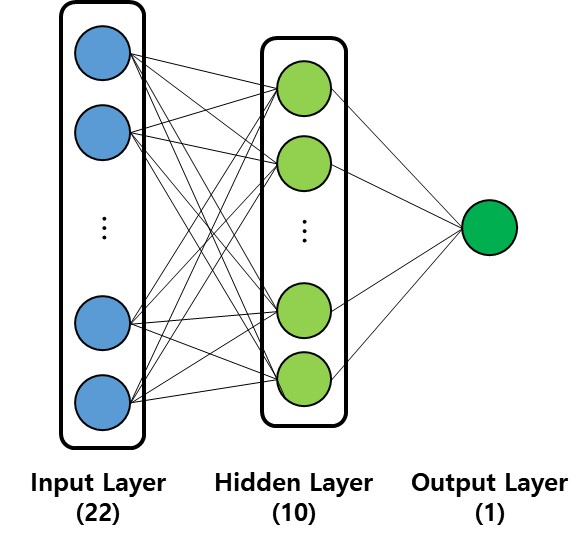

### MLP Classifier 정의
<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html'> Scikit-Learn MLP Classifier Manual </a>
- <b>hiddent_layer_sizes</b> - hidden layer 개수 
- <b>activation</b> - activation function 타입 (identity, logistic, tanh, <font color='red'>relu</font>)
- <b>solver    </b> - 경사하강법의 종류 (<font color='red'>adam</font>, sgd, lbfgs) <br>
- <b>batch_size</b> - 모델에 한번에 입력되는 데이터의 수 
- <b>learning_rate_init</b> - 한번 업데이트 하는 step size
- <b>max_iter </b> - 최대 학습 횟수 ( = Epochs )
- <b>verbose </b> - 학습 진행과정 출력 여부
- <b>random_state </b> - 랜덤시드

<img src='./image/image02.png' width='600'></img><br>
<img src="https://t1.daumcdn.net/cfile/tistory/9906BE3D5A3A642E06" width="600"></img><br>
<a href='https://t1.daumcdn.net/cfile/tistory/9906BE3D5A3A642E06'> https://t1.daumcdn.net/cfile/tistory/9906BE3D5A3A642E06 </a>

In [95]:
clf_mlp = MLPClassifier(hidden_layer_sizes=10,
                        activation='relu',
                        solver='adam',
                        batch_size=32,
                        learning_rate_init=0.01,
                        max_iter=200,
                        verbose=True,
                        random_state=0)

### MLP Classifier 학습

In [ ]:
clf_mlp.fit(train_X, train_y)

### 학습 상태 확인 (learning curve)

In [ ]:
plt.figure(figsize=(15, 8))

train_loss_values = clf_mlp.loss_curve_
plt.plot(train_loss_values,label='Train Loss')

plt.legend(fontsize=15)
plt.title("Learning Curve of trained MLP Classifier", size=20)
plt.show()

## 1-3. Multilayer Perceptron 모델 성능 평가

### 학습된 MLP Classifier 결과 확인: Confusion Matrix

<img src="https://t1.daumcdn.net/cfile/tistory/9908B7445E8BD68332" width="400"></img><br>
<a href='https://t1.daumcdn.net/cfile/tistory/9908B7445E8BD68332'> https://t1.daumcdn.net/cfile/tistory/9908B7445E8BD68332 </a>
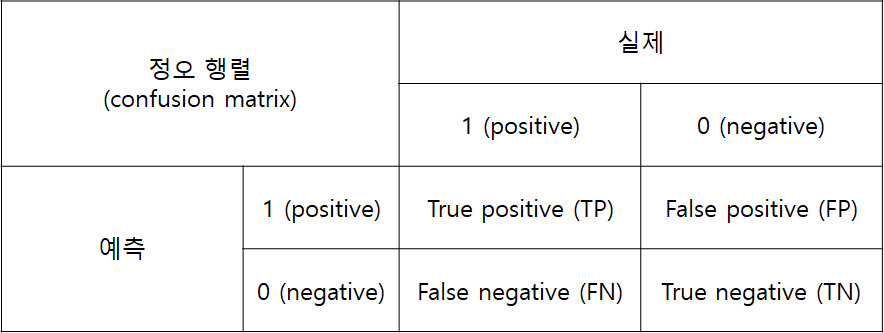

- <font color='red'>True</font> <font color='green'>Positive</font>(TP): positive class 잘 예측
- <font color='red'>False</font> <font color='green'>Negative</font>(FN): positive class를 negative class로 잘못 예측
- <font color='red'>False</font> <font color='green'>Positive</font>(FP): negative class를 positive class로 잘못 예측
- <font color='red'>True</font> <font color='green'>Negative</font>(TN): negative class 잘 예측
<br></br>

- <font color='red'>True</font>: 잘 예측한 경우
- <font color='red'>False</font>: 잘못 예측한 경우
- <font color='green'>Positive</font>(FP): 관심 대상이 되는 클래스, Parkinson's Disease
- <font color='green'>Negative</font>(TN): 관심 대상이 아닌 클래스, Healthy

### 학습된 MLP Classifier 결과 확인: Training Data

In [ ]:
# 학습한 데이터에 대한 예측값
train_y_pred = clf_mlp.predict(train_X)

# confusion matrix 계산
cm_train = confusion_matrix(y_true=train_y, y_pred=train_y_pred, labels=[1,0])

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(data=cm_train, annot=True, fmt='d', annot_kws={'size': 30}, cmap='Blues')
plt.xticks(ticks=[0.5,1.5], labels=[1,0], size=15)
plt.yticks(ticks=[0.5,1.5], labels=[1,0], size=15)
plt.xlabel('Predicted', size=20)
plt.ylabel('True', size=20)
plt.show()

### 학습된 MLP Classifier 결과 확인: Testing Data

In [ ]:
# 테스트 데이터에 대한 예측값
test_y_pred = clf_mlp.predict(test_X)

# confusion matrix 계산
cm_test = confusion_matrix(y_true=test_y, y_pred=test_y_pred, labels=[1,0])

# 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(data=cm_test, annot=True, fmt='d', annot_kws={'size': 30}, cmap='Blues')
plt.xticks(ticks=[0.5,1.5], labels=[1,0], size=15)
plt.yticks(ticks=[0.5,1.5], labels=[1,0], size=15)
plt.xlabel('Predicted', size=20)
plt.ylabel('True', size=20)
plt.show()

### 학습된 MLP Classifier 성능 평가: 다양한 평가 지표

<img src="https://t1.daumcdn.net/cfile/tistory/9908B7445E8BD68332" width="400"></img><br>
<a href='https://t1.daumcdn.net/cfile/tistory/9908B7445E8BD68332'> https://t1.daumcdn.net/cfile/tistory/9908B7445E8BD68332 </a>

#### Accuracy = $\frac{TP+TN}{TP+FP+FN+TN}$ 
#### Recall = $\frac{TP}{TP+FN}$
#### Precision = $\frac{TP}{TP+FP}$
#### F1 score = $\frac{2 \times Recall \times Precision}{Recall+Precision}$

- Accuracy: 전체 데이터중 정확히 예측한 비율
- Recall: 실제 positive class중 정확히 예측한 비율
- Precision: 예측된 positive class중 정확히 예측한 비율
- F1 socre: Recall과 Precision을 모두 고려한 평가지표

### 학습된 MLP Classifier 성능 평가: Training Data

In [ ]:
train_acc = accuracy_score(train_y, train_y_pred)
train_rec = recall_score(train_y, train_y_pred)
train_prec = precision_score(train_y, train_y_pred)
train_f1 = f1_score(train_y, train_y_pred)


print('Train Accuracy   : {:.3f}'.format(train_acc))
print('Train Sensitivity: {:.3f}'.format(train_rec))
print('Train Precision  : {:.3f}'.format(train_prec))
print('Train F1 Score   : {:.3f}'.format(train_f1))

### 학습된 MLP Classifier 성능 평가: Testing Data

In [ ]:
test_acc = accuracy_score(test_y, test_y_pred)
test_rec = recall_score(test_y, test_y_pred)
test_prec = precision_score(test_y, test_y_pred)
test_f1 = f1_score(test_y, test_y_pred)

print('Test Accuracy   : {:.3f}'.format(test_acc))
print('Test Recall     : {:.3f}'.format(test_rec))
print('Test Precision  : {:.3f}'.format(test_prec))
print('Test F1 Score   : {:.3f}'.format(test_f1))

---

## 2. 분석데이터 : Toyota Corolla (회귀 문제)

### 설명변수 (X)
- Mfg_Month
- Mfg_Year
- KM
- Fuel_Type
...
- Radio_cassette
- Tow_Bar

### 반응변수 (Y)
- Price

## 2-1. 데이터 전처리 및 탐색적 데이터 분석

### 데이터 불러오기

In [137]:
data = pd.read_csv('./LG_time_series_day08/data/toyotacorolla.csv')

### 데이터 확인

In [ ]:
print('Data shape: {}'.format(data.shape))
data.head(2)

In [ ]:
data.describe()

### 불필요한 변수 제거

In [ ]:
# Id, Model column 고유 개수
num_id = len(data['Id'].unique())
num_model = len(data['Model'].unique())

print(f'ID: {num_id}')
print(f'Model: {num_model}')

In [141]:
# 변수 제거
data.drop(columns=['Id', 'Model'], axis=1, inplace=True)

### 범주형 설명변수에 대한 Dummy 변수 생성

In [ ]:
display(data['Fuel_Type'])
display(data.groupby('Fuel_Type')['Fuel_Type'].count())

### 원핫인코딩

<img src="https://z-images.s3.amazonaws.com/d/d5/MtimFxh.png" width="600"></img><br>
<a href='https://z-images.s3.amazonaws.com/d/d5/MtimFxh.png'> https://z-images.s3.amazonaws.com/d/d5/MtimFxh.png </a>

In [143]:
# 원핫인코딩
data_new = pd.get_dummies(data)

In [ ]:
data.head(2)

In [ ]:
data_new.head(2)

### 설명변수(X)와 반응변수(Y) 정의

In [146]:
X = data_new.drop(labels='Price', axis=1)
y = data_new['Price']

### 학습데이터(Training Dataset)와 테스트 데이터(Testing Dataset) 분리

In [147]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

### 정규화 : Standardization(표준정규화) with Standard Scaler

In [ ]:
train_X.describe()

In [149]:
# 정규화
scaler = StandardScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [ ]:
pd.DataFrame(train_X, columns = X.columns).describe()

## 2-2. 모델링: Multilayer Perceptron (MLP) Regressor

### MLP Regressor 정의
<a href='http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html'> Scikit-Learn MLP Regressor Manual </a>

- <b>hiddent_layer_sizes</b> - hidden layer 개수 
- <b>activation</b> - activation function 타입 (identity, logistic, tanh, <font color='red'>relu</font>)
- <b>solver    </b> - 경사하강법의 종류 (<font color='red'>adam</font>, sgd, lbfgs) <br>
- <b>batch_size</b> - 모델에 한번에 입력되는 데이터의 수 
- <b>learning_rate_init</b> - 한번 업데이트 하는 step size
- <b>max_iter </b> - 최대 학습 횟수 ( = Epochs )
- <b>verbose </b> - 학습 진행과정 출력 여부
- <b>random_state </b> - 랜덤시드

In [151]:
reg_mlp = MLPRegressor(hidden_layer_sizes=10,
                        activation='relu',
                        solver='adam',
                        batch_size=32,
                        learning_rate_init=0.01,
                        max_iter=200,
                        verbose=True,
                        random_state=0)

### MLP Regressor 학습

In [ ]:
reg_mlp.fit(train_X, train_y)

### 학습 상태 확인 (learning curve)

In [ ]:
plt.figure(figsize=(18,8))

train_loss_values = reg_mlp.loss_curve_
plt.plot(train_loss_values,label='Train Loss')

plt.legend(fontsize=20)
plt.title("Learning Curve of trained MLP Regressor", fontsize=20)
plt.show()

## 2-3. Multilayer Perceptron 모델 성능 평가

### 학습된 MLP Regressor 성능 평가: 다양한 평가 지표

#### MAE = $\frac{1}{n} \sum_{i=1}^n \left\vert{y_i}-\hat{y_i}\right\vert$ 
#### MSE = $\frac{1}{n} \sum_{i=1}^n ({y_i}-\hat{y_i})^2$ 
#### MAPE = $\frac{1}{n} \sum_{i=1}^n \frac{\left\vert{y_i}-\hat{y_i}\right\vert}{max(\epsilon, \left\vert{y_i}\right\vert)}$ 
#### R2 = $1 - \frac{\sum_{i=1}^n({y_i}-{\hat{y_i}})^2}{\sum_{i=1}^n({y_i}-{\bar{y}})^2} $

- n: 데이터 개수
- $y_i$: 실제값
- $\hat{y_i}$: 예측값
- $\bar{y}$: 실제값의 평균
<br></br>
- Mean Absolute Error (MAE): 오차 절대값의 평균
- Mean Squared Error (MSE): 오차 제곱의 평균
- Mean Absolute Percentage Error (MAPE): 최대값 대비 오차의 평균
- $R^2$: 평균 대비 오차의 평균

### 학습된 MLP Regressor 결과 확인 및 성능 평가 : Training Data

In [ ]:
# 학습한 데이터에 대한 예측값
train_y_pred = reg_mlp.predict(train_X)

train_mae = mean_absolute_error(train_y, train_y_pred)
train_mse = mean_squared_error(train_y, train_y_pred)
train_mape = mean_absolute_percentage_error(train_y, train_y_pred)
train_r2 = r2_score(train_y, train_y_pred)

print('Train MAE  : {:.3f}'.format(train_mae))
print('Train MSE  : {:.3f}'.format(train_mse))
print('Train MAPE : {:.3f}'.format(train_mape))
print('Train R2   : {:.3f}'.format(train_r2))

### 학습된 MLP Regressor 결과 확인 및 성능 평가 : Testing Data

In [ ]:
# 학습한 데이터에 대한 예측값
test_y_pred = reg_mlp.predict(test_X)

test_mae = mean_absolute_error(test_y, test_y_pred)
test_mse = mean_squared_error(test_y, test_y_pred)
test_mape = mean_absolute_percentage_error(test_y, test_y_pred)
test_r2 = r2_score(test_y, test_y_pred)

print('Test MAE  : {:.3f}'.format(test_mae))
print('Test MSE  : {:.3f}'.format(test_mse))
print('Test MAPE : {:.3f}'.format(test_mape))
print('Test R2   : {:.3f}'.format(test_r2))

### MLP Regressor 예측 결과 결과 확인 : Testing Data

In [ ]:
# 산점도 그래프
fig_values = np.concatenate([test_y.squeeze(), test_y_pred.squeeze()])
vmin = np.min(fig_values) * 0.95
vmax = np.max(fig_values) * 1.05

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Testing Data)', size=18)
plt.scatter(test_y, test_y_pred)
plt.plot([vmin, vmax], [vmin, vmax], color='grey', linestyle='dashed')
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.show()